# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [43]:
#CARREGANDO PACOTES
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import statsmodels.formula.api as smf
%matplotlib inline
plt.rc('figure', figsize=(6, 4))

In [44]:
#carregando a base
tips = sns.load_dataset("tips")

#criando as colunas tip_pct e net_bill ()
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip']) #(percentual de gorjeta)
tips['net_bill'] = tips['total_bill'] - tips['tip'] #(total da conta - gorjeta)

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Sat, 29 Jul 2023   Prob (F-statistic):           1.52e-06
Time:                        23:13:36   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.0

<AxesSubplot:xlabel='net_bill', ylabel='tip_pct'>

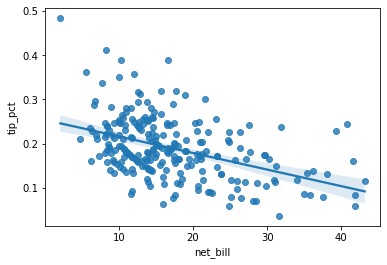

In [45]:
#modelo de regressão tip_pct explicada por net_bill
reg = smf.ols('tip_pct ~ net_bill', data = tips).fit()

print(reg.summary()) #resumo da regressão

# Gráfico de dispersão tip_pct x net_bill
sns.regplot(y = 'tip_pct', x = 'net_bill', data = tips[tips['tip_pct']<.5])

No sumário acima podemos ver que temos um R-quadrado de aproximadamente 9,1%, isso significa que somente essa porcentagem de dados se ajusta à nossa regressão. 

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     67.94
Date:                Sat, 29 Jul 2023   Prob (F-statistic):           1.11e-14
Time:                        23:13:37   Log-Likelihood:                 336.23
No. Observations:                 242   AIC:                            -668.5
Df Residuals:                     240   BIC:                            -661.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.38

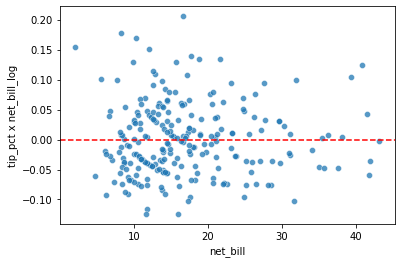

In [46]:
#modelo de regressão tip_pct explicada por log de net_bill
reg1 = smf.ols('tip_pct ~ np.log(net_bill+.1)', data = tips[tips['tip_pct']<.5]).fit() #colocamos o +0.1 para ele não calcular log de negativo
print(reg1.summary()) #exibindo sumário

#criando a var que receberá o modelo
tips['tip_pct x net_bill_log'] = reg1.resid

#plotando o gráfico mantendo a variável x e utilizando o mod de regressão para o y:
sns.scatterplot(x = 'net_bill', y = 'tip_pct x net_bill_log', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

Utilizando o log de net_bill temos um gráfico um pouco menos padronizado, temos agora um ajuste à regressão de 22,1%, uma melhora considerável. 

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     30.98
Date:                Sat, 29 Jul 2023   Prob (F-statistic):           1.09e-12
Time:                        23:13:39   Log-Likelihood:                 333.96
No. Observations:                 242   AIC:                            -661.9
Df Residuals:                     239   BIC:                            -651.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.29

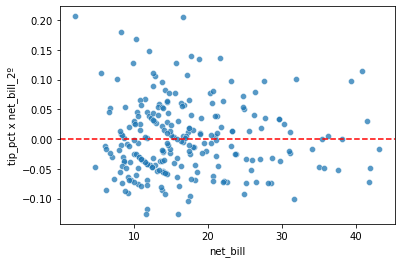

In [47]:
#modelo de regressão tip_pct explicada por polinomio de segundo grau em net_bill
reg2= smf.ols('tip_pct ~ net_bill + np.power(net_bill,2)', data = tips[tips['tip_pct']<.5]).fit() #np.power(x,2) = indica que quero net_bill na potência 2
print(reg2.summary())  #exibindo sumário

#criando a var que receberá o modelo
tips['tip_pct x net_bill_2º']=reg2.resid 

#plotando o gráfico mantendo a variável x e utilizando o mod de regressão para o y:
sns.scatterplot(x = 'net_bill', y = 'tip_pct x net_bill_2º', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

O ajuste anterior nos deu um R-quadrado maior, portanto, o uso daquela é preferível ao uso desta. 

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

                             OLS Regression Results                             
Dep. Variable:     np.log(tip_pct + .1)   R-squared:                       0.214
Model:                              OLS   Adj. R-squared:                  0.211
Method:                   Least Squares   F-statistic:                     65.35
Date:                  Sat, 29 Jul 2023   Prob (F-statistic):           3.09e-14
Time:                          23:13:42   Log-Likelihood:                 36.609
No. Observations:                   242   AIC:                            -69.22
Df Residuals:                       240   BIC:                            -62.24
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0323      0.032

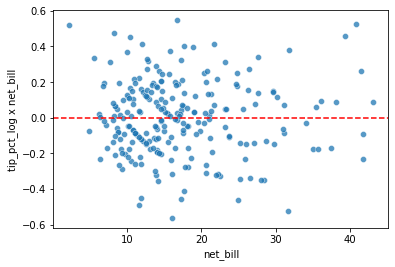

In [48]:
#modelo de regressão log do tip_pct explicado por net_bill
reg3 = smf.ols('np.log(tip_pct+.1) ~ net_bill', data = tips[tips['tip_pct']<.5]).fit() #colocamos o +0.1 para ele não calcular log de negativo
print(reg3.summary())

#criando a var que receberá o modelo
tips['tip_pct_log x net_bill'] = reg3.resid

#plotando o gráfico mantendo a variável x e utilizando o mod de regressão para o y:
sns.scatterplot(x = 'net_bill', y = 'tip_pct_log x net_bill', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

Novamente, a função utilizada no exerício de número 2 trouxe um ajuste melhor, apesar de não ser uma grande diferença de R-quadrado entre as duas. 

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

                             OLS Regression Results                             
Dep. Variable:     np.log(tip_pct + .1)   R-squared:                       0.228
Model:                              OLS   Adj. R-squared:                  0.225
Method:                   Least Squares   F-statistic:                     70.94
Date:                  Sat, 29 Jul 2023   Prob (F-statistic):           3.39e-15
Time:                          23:14:06   Log-Likelihood:                 38.806
No. Observations:                   242   AIC:                            -73.61
Df Residuals:                       240   BIC:                            -66.63
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept 

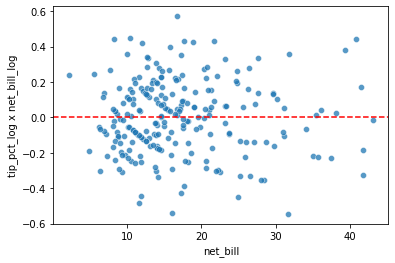

In [49]:
#modelo de regressão log do tip_pct explicado por log de net_bill
reg4 = smf.ols('np.log(tip_pct+.1) ~ np.log(net_bill+.1)', data = tips[tips['tip_pct']<.5]).fit() #colocamos o +0.1 para ele não calcular log de negativo
print(reg4.summary())

#criando a var que receberá o modelo:
tips['tip_pct_log x net_bill_log'] = reg4.resid

#plotando o gráfico mantendo a variável x e utilizando o mod de regressão para o y:
sns.scatterplot(x = 'net_bill', y = 'tip_pct_log x net_bill_log', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

Utilizando a função log para as duas variáveis, obtemos um R-quadrado de 22,8%. 

###  6. qual modelo resultou no melhor ajuste?

O modelo do exercício de número 5, onde é calculado o log da variável x e também da variável y. Ele é o modelo com o maior R-quadrado, estando um pouco a frente do modelo do exercício 2. 